In [1]:
#task ...in this project we are building a machine learning model which can successfully predict the medical insurance premium
#price
#dataset kaggle

In [2]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize']=(15,10)

In [3]:
#loading the dataset
df=pd.read_csv('C://users/sojore/Downloads/EDITS/Medical Insurance Premium Prediction/Medicalpremium.csv')
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [4]:
#exploring the dataset
df.groupby('Age')['Age'].agg('count').head()

Age
18    23
19    21
20    17
21    21
22    19
Name: Age, dtype: int64

In [5]:
df.isna().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [6]:
df.shape

(986, 11)

In [7]:
df.dtypes

Age                        int64
Diabetes                   int64
BloodPressureProblems      int64
AnyTransplants             int64
AnyChronicDiseases         int64
Height                     int64
Weight                     int64
KnownAllergies             int64
HistoryOfCancerInFamily    int64
NumberOfMajorSurgeries     int64
PremiumPrice               int64
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

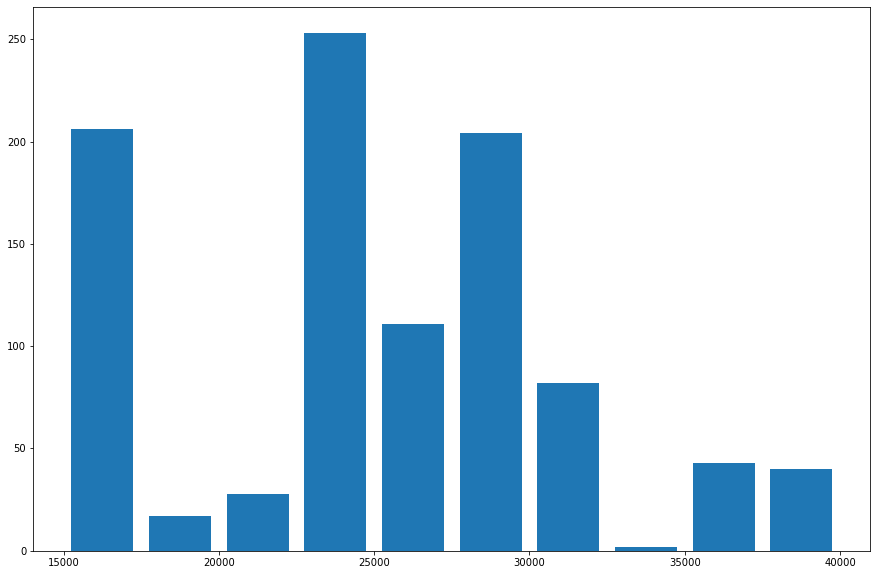

In [8]:
#ploting out histograms
plt.hist(df.PremiumPrice,rwidth=0.8)
plt.show

In [11]:
#handling outliers
df.head(2)

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000


In [12]:
df['Age2']=df['Age']**2
df['Height2']=df['Height']**2
df['Weight2']=df['Weight']**2

In [13]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,Age2,Height2,Weight2
0,45,0,0,0,0,155,57,0,0,0,25000,2025,24025,3249
1,60,1,0,0,0,180,73,0,0,0,29000,3600,32400,5329
2,36,1,1,0,0,158,59,0,0,1,23000,1296,24964,3481
3,52,1,1,0,1,183,93,0,0,2,28000,2704,33489,8649
4,38,0,0,0,1,166,88,0,0,1,23000,1444,27556,7744


In [15]:
df.shape

(986, 14)

In [16]:
#we gonna use quantile function to filter outliers
ll1=df.Age2.quantile(0.01)
ul1=df.Age2.quantile(0.99)
df[(df.Age2<=ll1) | (df.Age2>=ul1)]
df1=df[(df.Age2>ll1) & (df.Age2<ul1)]
df1.shape

(940, 14)

In [18]:
ll2=df1.Height2.quantile(0.01)
ul2=df1.Height2.quantile(0.99)
df1[(df1.Height2<=ll2) | (df1.Height2>=ul2)]
df2=df1[(df1.Height2>ll2) & (df1.Height2<ul2)]
df2.shape

(905, 14)

In [20]:
ll3=df2.Weight2.quantile(0.01)
ul3=df2.Weight2.quantile(0.99)
df2[(df2.Weight2<=ll3) | (df2.Weight2>=ul3)]
df3=df2[(df2.Weight2>ll3) & (df2.Weight2<ul3)]
df3.shape

(885, 14)

In [22]:
ll4=df3.Age.quantile(0.01)
ul4=df3.Age.quantile(0.99)
df3[(df3.Age<=ll4) | (df3.Age>=ul4)]
df4=df3[(df3.Age>ll4) & (df3.Age<ul4)]
df4.shape

(852, 14)

In [25]:
ll5=df4.Height.quantile(0.01)
ul5=df4.Height.quantile(0.99)
df4[(df4.Height<=ll5) | (df4.Height>=ul5)]
df5=df4[(df4.Height>ll5) & (df4.Height<ul5)]
df5.shape

(812, 14)

In [27]:
ll6=df5.Weight.quantile(0.01)
ul6=df5.Weight.quantile(0.99)
df5[(df5.Weight<=ll6) | (df5.Weight>=ul6)]
df6=df5[(df5.Weight>ll6) & (df5.Weight<ul6)]
df6.shape

(787, 14)

In [29]:
df6.head(2)

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,Age2,Height2,Weight2
0,45,0,0,0,0,155,57,0,0,0,25000,2025,24025,3249
1,60,1,0,0,0,180,73,0,0,0,29000,3600,32400,5329


In [37]:
df6['price_per_height']=df6['PremiumPrice']/df6['Height']
df6['price_per_weight']=df6['PremiumPrice']/df6['Weight']
df7=df6.copy()

<ipython-input-37-2fa9cac35968>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['price_per_height']=df6['PremiumPrice']/df6['Height']
<ipython-input-37-2fa9cac35968>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['price_per_weight']=df6['PremiumPrice']/df6['Weight']


In [38]:
df7.sample(3)

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,Age2,Height2,Weight2,price_per_height,price_per_weight
756,64,0,1,0,0,170,58,0,0,2,28000,4096,28900,3364,164.705882,482.758621
820,40,0,1,0,0,161,67,1,1,1,31000,1600,25921,4489,192.546584,462.686567
472,47,0,1,0,0,170,77,0,0,1,23000,2209,28900,5929,135.294118,298.701299


In [40]:
ll7=df7.price_per_height.quantile(0.01)
ul7=df7.price_per_height.quantile(0.99)
df7[(df7.price_per_height<=ll7) | (df7.price_per_height>=ul7)]
df8=df7[(df7.price_per_height>ll7) & (df7.price_per_height<ul7)]
df8.shape

(771, 16)

In [42]:
ll8=df8.price_per_weight.quantile(0.01)
ul8=df8.price_per_weight.quantile(0.99)
df8[(df8.price_per_weight<=ll8) | (df8.price_per_weight>=ul8)]
df9=df8[(df8.price_per_weight>ll8) & (df8.price_per_weight<ul8)]
df9.shape

(754, 16)

<function matplotlib.pyplot.show(close=None, block=None)>

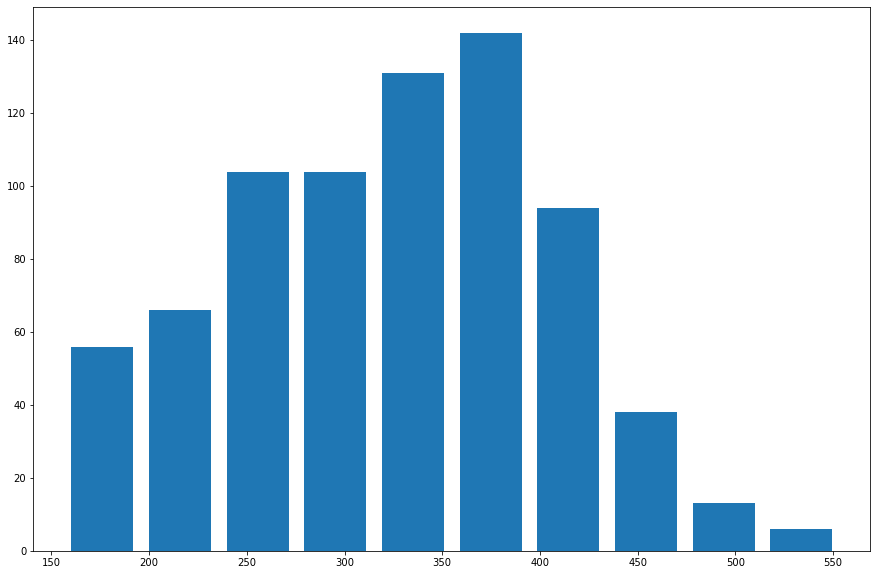

In [43]:
plt.hist(df9.price_per_weight,rwidth=0.8)
plt.show

In [48]:
#this kinda is a normal distribution which is pretty cool
#next we gonna drop unneccesary columns
df10=df9.drop(['Age2','Height2','Weight2','price_per_weight','price_per_height'],axis='columns')
df10.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [50]:
#preparing the training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df10.drop('PremiumPrice',axis=1),df10.PremiumPrice,test_size=0.2,random_state=10)

In [51]:
X_train.shape

(603, 10)

In [52]:
len(X_test)

151

In [54]:
y_train.head()

40     15000
181    23000
711    23000
84     25000
631    25000
Name: PremiumPrice, dtype: int64

In [55]:
##creating a machine learning model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [56]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [57]:
lr.score(X_test,y_test)

0.7174561533199498

In [58]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
def find_best_model_using_gridsearchcv(X,y):
    models={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        },
        'svm':{
            'model':SVC(),
            'params':{
                'C':[1,2,3],
                'kernel':['linear','rbf']
            }
        },
        'random_forest':{
            'model':RandomForestClassifier(),
            'params':{
                
            }
        },
        'logistic_regression':{
            'model':LogisticRegression(),
            'params':{}
        }
    }
#this is what we call hyper parameter tunning

    my_scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for model_name,config in models.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        my_scores.append({
            'model':model_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(my_scores,columns=['model','best_score','best_params'])


In [59]:
find_best_model_using_gridsearchcv(X_train,y_train)

C:\Users\sojore\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sojore\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

,model,best_score,best_params
0,linear_regression,0.594927,{'normalize': True}
1,lasso,0.594869,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.663220,"{'criterion': 'mse', 'splitter': 'best'}"
3,svm,0.834711,"{'C': 3, 'kernel': 'linear'}"
4,random_forest,0.900826,{}
5,logistic_regression,0.636364,{}


In [60]:
#from the above i can choose the best algorithm to create my model
#i will simply employ RandomForestClassifier for my model creation
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [61]:
#let me get the score of the model
model.score(X_test,y_test)

0.9271523178807947

In [62]:
X_test.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
768,30,1,1,0,1,164,65,0,0,0
380,62,1,1,0,0,175,60,0,0,2
33,26,0,0,0,0,154,88,0,0,0
233,29,1,1,0,1,172,59,1,0,1
716,54,0,1,0,0,175,61,0,0,0


In [63]:
#now i can use the model to do predictions
y_predicted=model.predict(X_test)
y_predicted[:10]

array([21000, 28000, 15000, 19000, 25000, 23000, 38000, 23000, 28000,
       28000], dtype=int64)

In [64]:
y_test[:10]

768    21000
380    28000
33     15000
233    21000
716    25000
497    23000
169    38000
523    23000
335    28000
526    28000
Name: PremiumPrice, dtype: int64

Text(159.0, 0.5, 'Truth')

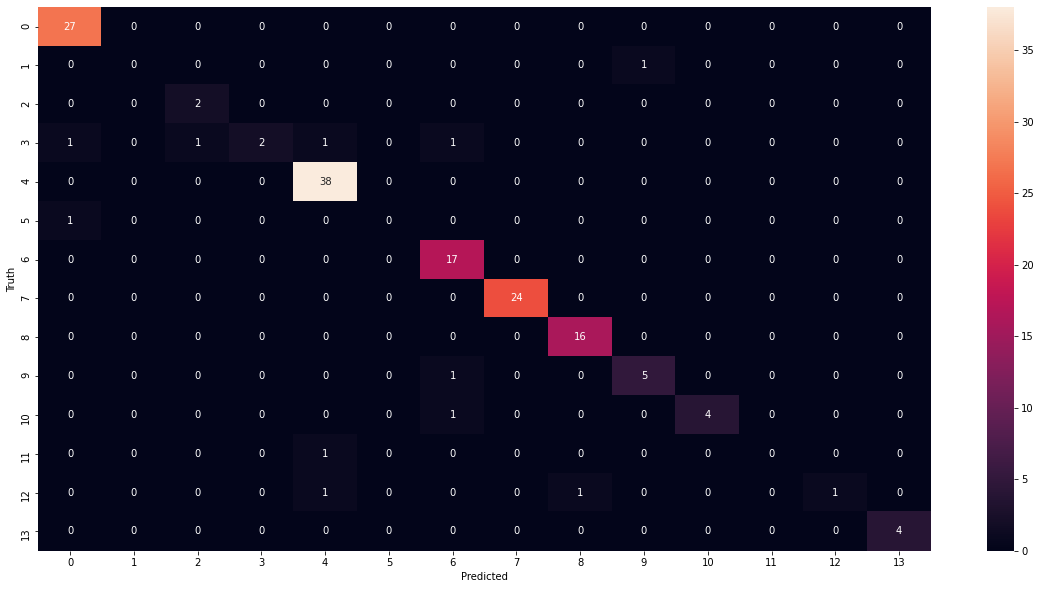

In [65]:
##from the above predictions ,my model is absolutely predicting the correct results
#next i will create a heatmap for a better visualization of the predicted results
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sn
cm=confusion_matrix(y_test,y_predicted)
plt.figure(figsize=(20,10))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [66]:
#my model is doing pretty good on doing the predictions
#next i can print a classification report
print('Classification Report: \n',classification_report(y_test,y_predicted))

Classification Report: 
               precision    recall  f1-score   support

       15000       0.93      1.00      0.96        27
       18000       0.00      0.00      0.00         1
       19000       0.67      1.00      0.80         2
       21000       1.00      0.33      0.50         6
       23000       0.93      1.00      0.96        38
       24000       0.00      0.00      0.00         1
       25000       0.85      1.00      0.92        17
       28000       1.00      1.00      1.00        24
       29000       0.94      1.00      0.97        16
       30000       0.83      0.83      0.83         6
       31000       1.00      0.80      0.89         5
       32000       0.00      0.00      0.00         1
       35000       1.00      0.33      0.50         3
       38000       1.00      1.00      1.00         4

    accuracy                           0.93       151
   macro avg       0.72      0.66      0.67       151
weighted avg       0.92      0.93      0.91       151



C:\Users\sojore\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
